In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("house_rental_data.csv.txt", index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [4]:
#Getting an idea about Null values
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

C:\Users\Sindhiya\AppData\Local\Temp\ipykernel_12588\15493674.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], bins=20)


<Axes: xlabel='Price', ylabel='Density'>

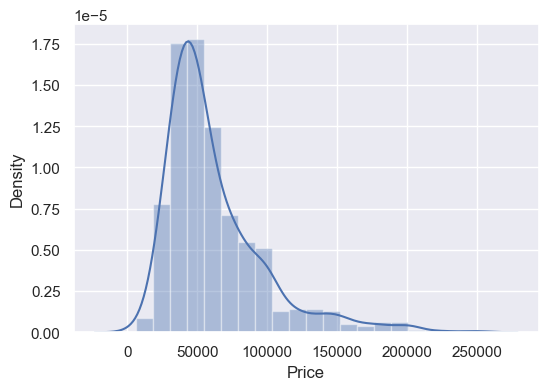

In [5]:
#Outlier detection in target varible

sns.set(rc = {'figure.figsize': (6,4)})
sns.distplot(df['Price'], bins=20)

<Axes: xlabel='Price'>

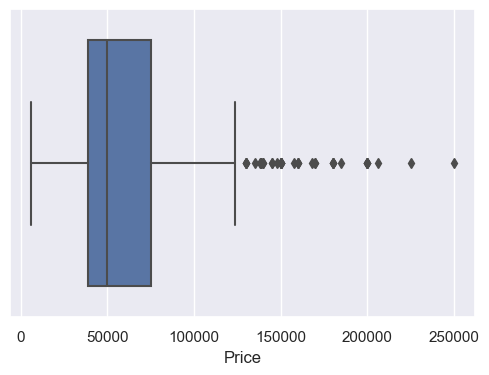

In [6]:
#Boxplot

sns.boxplot(x = df.Price)

In [ ]:
plt.scatter(df.Sqft, df.Price)
plt.show()

<Axes: >

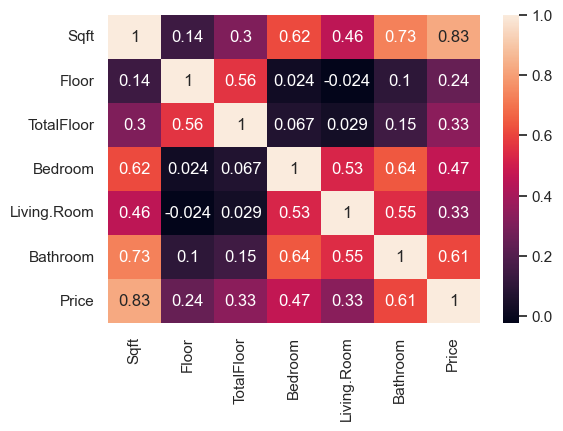

In [58]:
#Multi collinearity Test

cm = df.corr()
sns.heatmap(cm, annot=True)

In [39]:
#here only "sqft" is strongly correlated with price

In [59]:
#Seperating the input and output features

X = df[['Sqft']]
y = df['Price']


In [60]:
#Train and Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 7)

In [43]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
pred = model.predict(X_test)
pred

array([ 54091.6705476 ,  85481.21582114, 139699.52129362,  37785.41326265,
        34388.27632828,  85617.10129852,  76376.88883704,  44579.68713138,
        87247.72702701,  44579.68713138,  53004.58672861,  56537.60914035,
        31262.91034866,  71756.78260631,  62788.34109958,  55994.06723085,
        32893.53607716,  40639.00828751,  54091.6705476 , 117006.64657206,
        17538.47713383,  43220.83235763,  55722.2962761 ,  39144.26803639,
        69039.07305881,  37105.98587577,  46074.4273825 ,  62788.34109958,
        74746.26310855,  85481.21582114,  28952.85723329, 101515.70215135,
       164158.90722106, 100836.27476448,  82627.62079628,  30991.13939391,
        37921.29874002,  44579.68713138,  58168.23486884,  48656.25145262,
        58032.34939147,  33301.19250928,  18217.9045207 ,  59527.08964259,
        47297.39667887,  30991.13939391,  24332.75100256,  56945.26557247,
        49879.22074899,  57081.15104984,  83986.47557002,  52189.27386436,
       130731.0797869 ,  

In [63]:
#Getting r2_score and rmse

r2 = metrics.r2_score(y_test,pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

print('R2 Score:', r2)
print('RMSE: ', rmse)

R2 Score: 0.639041315960011
RMSE:  17730.146525360284
